# **Rodrigo_Mesquita_DR4_AT**
## **Inteligência Artificial: Clusterização [24E2_4]**

### 1.Utilizando o dataset Wine Quality para realizar clusterização utilizando clusterização aglomerativa hierárquica. Você deve passar pelas seguintes etapas:

In [17]:
%pip install nltk
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


> #### 1A.Pré-processar os dados utilizando um scaler

In [19]:
df = pd.read_csv('/workspaces/Faculdade/Datasets/WineQT.csv')
X = df.drop('quality', axis=1)
Y = df['quality']

#Normalizando
scaler = StandardScaler()
X = scaler.fit_transform(X)

> #### 1B.Plotar o dendrograma e analisar o melhor número de clusters

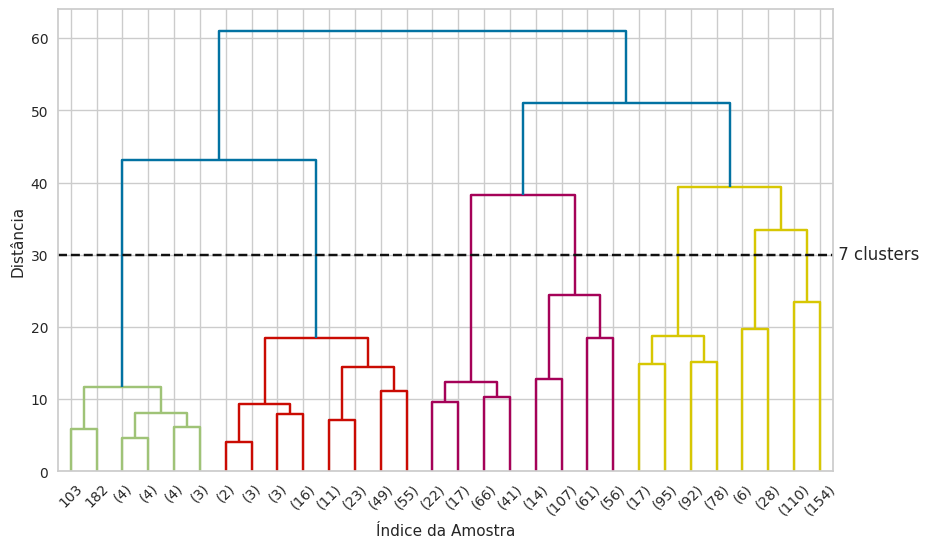

In [20]:
linkage_array = ward(X)

fig, ax = plt.subplots(figsize=(10, 6))
dendrogram(linkage_array, truncate_mode='level', p=4)


ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 30, ' 7 clusters', va='center', fontdict={'size': 12})

plt.xlabel("Índice da Amostra")
plt.ylabel("Distância")
plt.show()

> #### 1C.Calcule o coeficiente de silhueta para avaliar a qualidade dos clusters formado

In [21]:
# Testando treinar o modelo com linkage average
model = AgglomerativeClustering(n_clusters=7, linkage='ward')
preds = model.fit_predict(X)
sil_ward = silhouette_score(X, preds)

model = AgglomerativeClustering(n_clusters=6, linkage='average')
preds = model.fit_predict(X)
sil_avg = silhouette_score(X, preds)
print(f'Coeficiente de Silhueta: Ward {sil_ward} | Average {sil_avg}')

Coeficiente de Silhueta: Ward 0.14239406179541866 | Average 0.4742174955114661


> #### 1D.Discuta os resultados e sugira possíveis melhorias para a análise.

Com o método padrão (Ward) alcançamos um coeficiênte de silhueta de 0.13, que entendo como muito baixo, sendo assim:
* O primeiro passo seria testar os demais métodos de aglomeração. Já realizei esse teste e ajustei o número de clusters para 6, alcançando 0.47 com o 'average", o que entendo como satisfatório.
* Caso a troca de método não tivesse sido suficiente, poderia tentar reduzir a dimensionalidade e tratar outliers.

#### 2.Utilizando o dataset Wine Quality, realize o método Elbow para encontrar o melhor valor de k para o algoritmo KMeans. Encontrado o melhor valor de k, calcule o coeficiente de silhueta. Compare o resultado com a clusterização aglomerativa hierárquica feita na Questão 1.

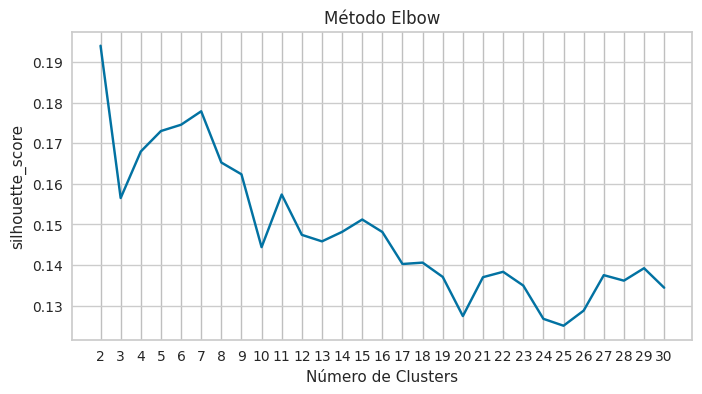

In [22]:
sil = []
range_k = range(2, 31)
for k in range_k:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=22)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    result = silhouette_score(X, preds)
    sil.append(result)

plt.figure(figsize=(8, 4))
#Ajustar o Xticks para que seja de 1 em 1
plt.xticks(range_k)
#Adicionar grid vertical
plt.grid(visible=True, axis='x', linestyle='-', color='gray', alpha=0.5)

# Plotar o gráfico do método Elbow
plt.plot(range_k, sil)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('silhouette_score')
plt.show()

In [23]:
# Comparando resultados
print(f'Kmeans com 7 Clusters {sil[5]}')
print(f'Aglomerative(Ward) com 7 Clusters {sil_ward}')
print(f'Aglomerative(Avg) com 6 Clusters {sil_avg}') 

Kmeans com 7 Clusters 0.17790547130256346
Aglomerative(Ward) com 7 Clusters 0.14239406179541866
Aglomerative(Avg) com 6 Clusters 0.4742174955114661


#### 3.Explique passo a passo utilizando figuras de sua autoria como funciona o processo do DBSCAN. Explique a importância dos parâmetros epsilon e MinPts durante sua explicação.Explique o que é ruído, pontos core e de borda.

> #### Já adicinonei as explicações solicitadas na própria ilustração criada.

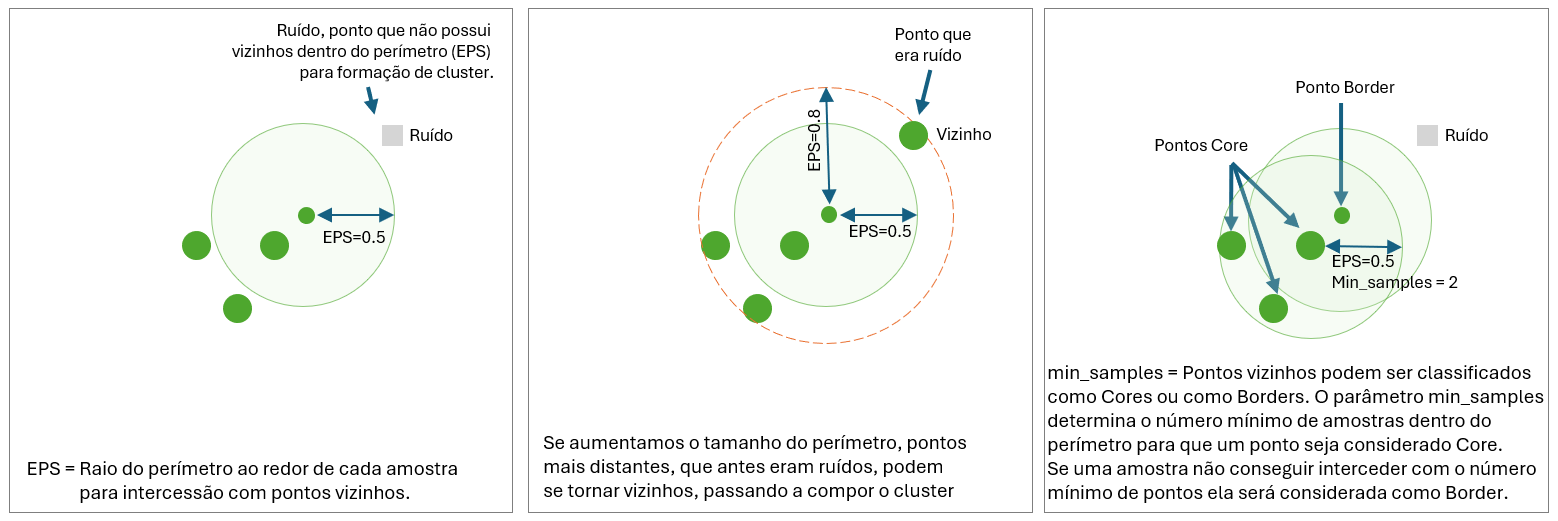

#### 4.Utilize o dataset sintético make_moons com 300 pontos e utilize DBSCAN para realizar a clusterização. Faça um plot de dispersão mostrando os clusters criados, separando os clusters por cor.

In [24]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

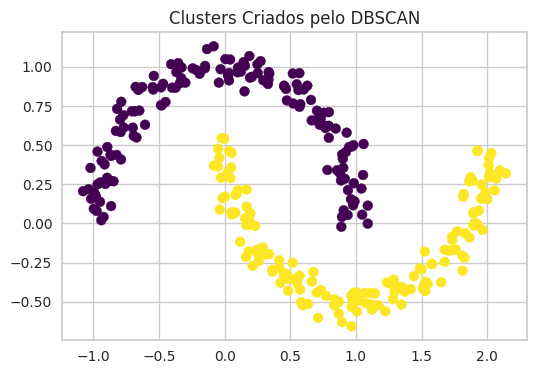

In [25]:
X, _ = make_moons(n_samples=300, noise=0.06, random_state=22)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Gráfico de dispersão
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters Criados pelo DBSCAN')
plt.show()

Para realizar as questões 5, 6 e 7 do AT use o dataset Amazon Massive Intent. Utilize o método TF-IDF para converter dados textuais em representações numéricas
#### 5.Utilize o KMeans para agrupar textos do dataset da amazon. Realize o método elbow para encontrar o melhor valor para k. Faça uma análise do resultado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from collections import Counter
from sklearn.metrics import silhouette_score

In [2]:
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

In [3]:
df = pd.read_json('/workspaces/Faculdade/Datasets/amazon-train.jsonl', lines=True)
X = df['text'].values
df

,id,label,text,label_text
0,1,48,wake me up at nine am on friday,alarm_set
1,2,48,set an alarm for two hours from now,alarm_set
2,4,46,olly quiet,audio_volume_mute
3,5,46,stop,audio_volume_mute
4,6,46,olly pause for ten seconds,audio_volume_mute
...,...,...,...,...
11509,17175,17,send hi in watsapp to vikki,email_querycontact
11510,17176,44,do i have emails,email_query
11511,17177,44,what emails are new,email_query
11512,17178,44,do i have new emails from john,email_query


In [4]:
classes = df['label_text'].unique()
print(f'Quantidade de Classes: {len(classes)}')

Quantidade de Classes: 60


In [5]:
nltk.download('wordnet')

#Leematizando o texto
data_lem = []
lemmatizer = WordNetLemmatizer()
for doc in X:
  doc = doc.lower()
  doc_lem = ' '.join(lemmatizer.lemmatize(word) for word in doc.split())
  data_lem.append(doc_lem)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#Aplicando TF-IDF
max_df = 0.5
min_df = 5
tfidf = TfidfVectorizer(max_df= max_df, min_df= min_df, stop_words='english')
vect = tfidf.fit_transform(data_lem)

In [21]:
#Treinar o Kmeans e iterar com diferentes valores de K para avaliar a quantidade idade, utilizando os métodos elbow e silhouette
elbow, silhouette = {},{}
for k in range(2, 60, 1):
    model = KMeans(n_clusters= k, max_iter=1000, random_state=42).fit(vect)
    preds = model.predict(vect)
    elbow[k] = model.inertia_
    silhouette[k] = silhouette_score(vect,preds)

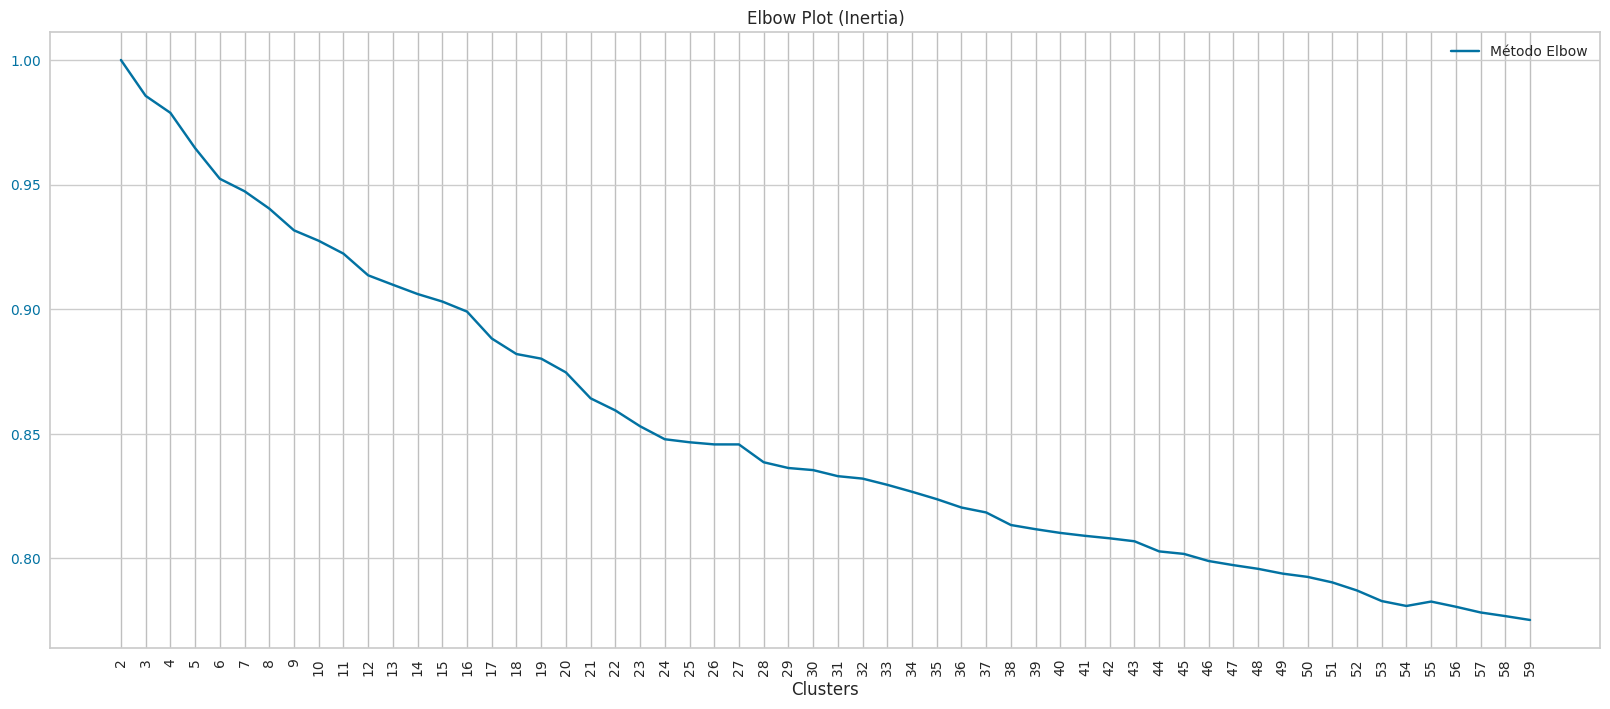

In [22]:
#Plortar os gráficos de Elbow e Silhouete
maximo = max(elbow.values())
for key in elbow:
    elbow[key] = float(elbow[key]) / maximo

#Gráfico Elbow
fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.plot(list(elbow.keys()), list(elbow.values()), label="Método Elbow", color='b')
ax1.set_xlabel('Clusters', fontsize=12)
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper right')

#Ajustar o Xticks para que seja de 1 em 1
ax1.set_xticks(list(elbow.keys()))
ax1.set_xticklabels(list(elbow.keys()))
#rotacionar os Xticks
plt.xticks(rotation=90)
#Adicionar grid vertical
ax1.grid(visible=True, axis='x', linestyle='-', color='gray', alpha=0.5)

plt.title('Elbow Plot (Inertia)')
plt.show()


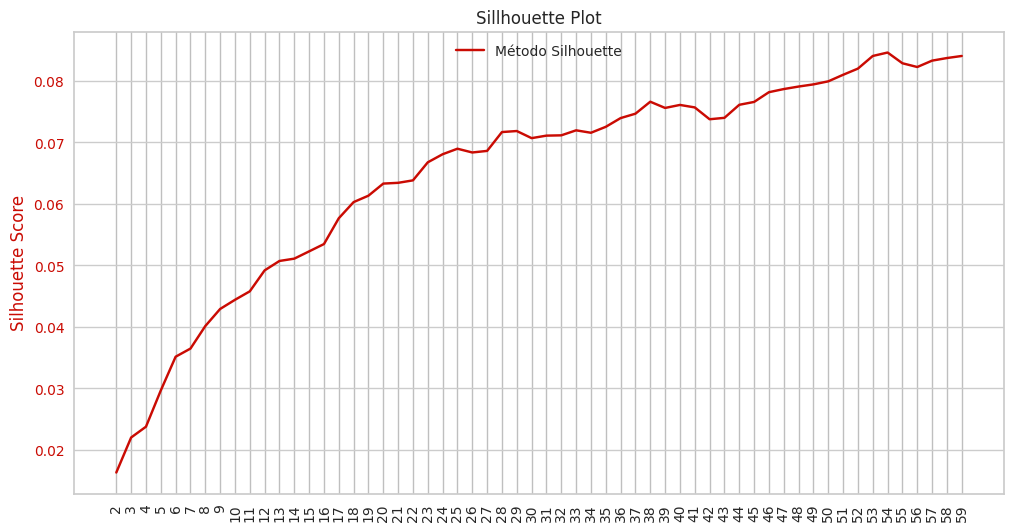

In [23]:
# Gráfico Silhouete
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(list(silhouette.keys()), list(silhouette.values()), label="Método Silhouette", color='r')
ax1.set_ylabel('Silhouette Score', fontsize=12, color='r')
ax1.tick_params('y', colors='r')
ax1.legend(loc='upper center')

#Ajustar o Xticks para que seja de 1 em 1
ax1.set_xticks(list(elbow.keys()))
ax1.set_xticklabels(list(elbow.keys()))
#rotacionar os Xticks
plt.xticks(rotation=90)
#Adicionar grid vertical
ax1.grid(visible=True, axis='x', linestyle='-', color='gray', alpha=0.5)

plt.title('Sillhouette Plot')
plt.show()


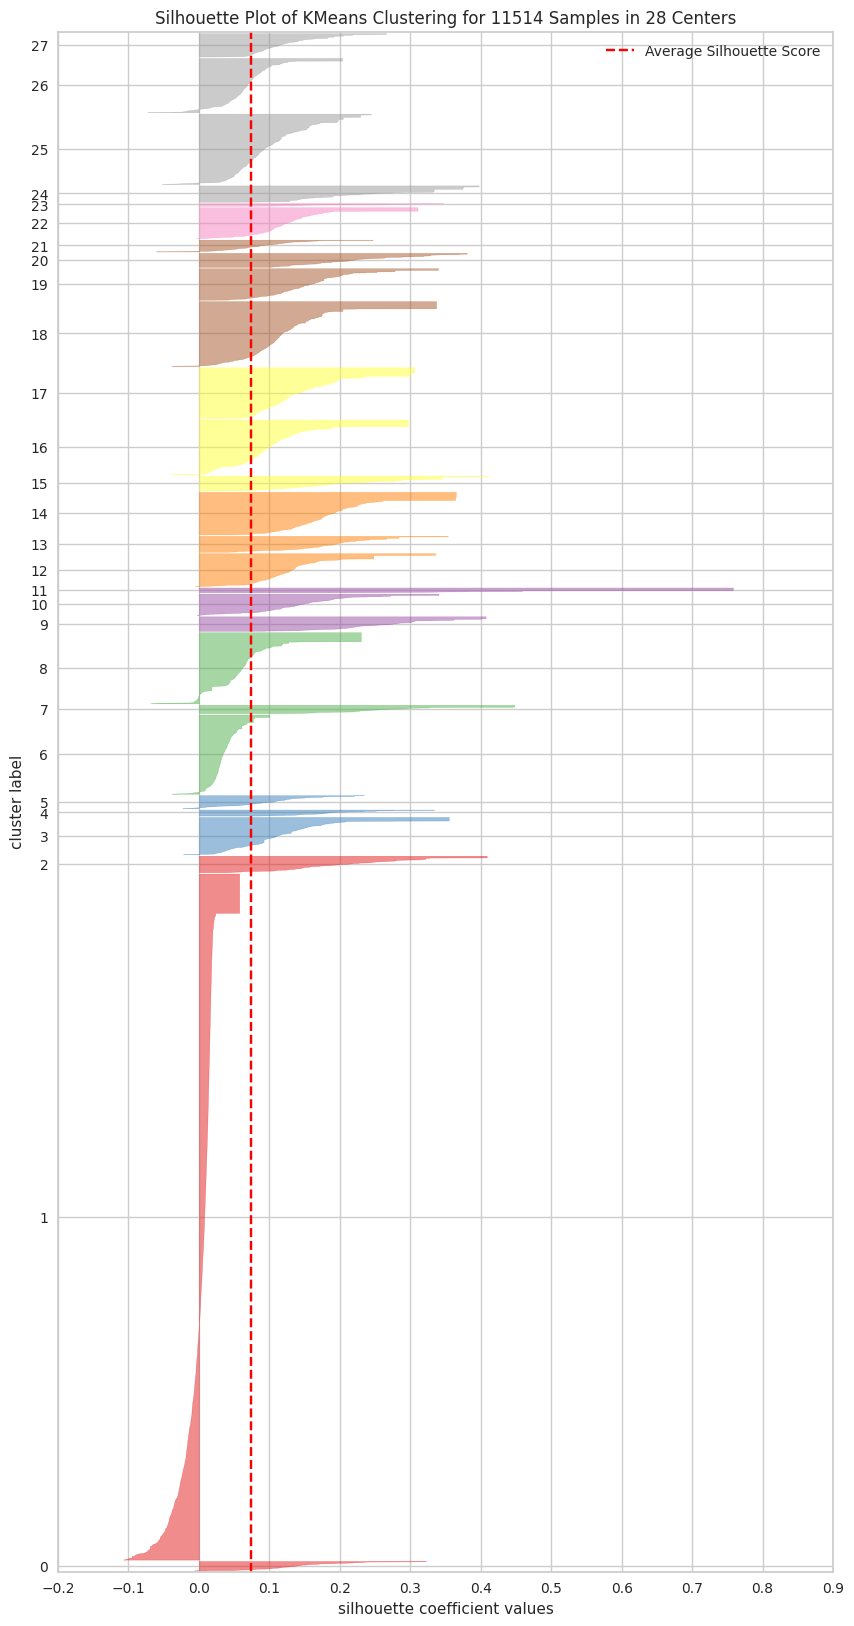

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11514 Samples in 28 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
tfidf = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english')
vect = tfidf.fit_transform(data_lem)

K = 28
#Visualizar o Silhouette por cluster com o valor de K escolhido
model = KMeans(n_clusters= K, max_iter=1000,n_init=1, random_state=22).fit(vect)
#Aumentar o tamanho do gráfico de silhouette
plt.figure(figsize=(10, 20))
SilhouetteVisualizer(model).fit(vect).show()

In [41]:
#Imprimindo o conteúdo de cada cluster
cluster_labels = {}
labels = model.labels_

for i in range(K):
    cluster_samples = df[labels == i]
    cluster_label_counts = Counter(cluster_samples['label_text'])
    cluster_label_text = ', '.join([f"{label}: {count}" for label, count in cluster_label_counts.items()])
    cluster_size = len(cluster_samples)
    cluster_num_classes = len(cluster_label_counts)
    cluster_labels[f'Cluster {i}'] = (cluster_num_classes, cluster_label_text, cluster_size)

for cluster, (num_classes, label_text, size) in cluster_labels.items():
    print(f"{cluster} [{size} amostras |{num_classes} rótulos] : {label_text}")

Cluster 0 [73 amostras |13 rótulos] : music_settings: 1, takeaway_query: 1, iot_hue_lightchange: 1, calendar_query: 19, play_music: 3, calendar_set: 22, calendar_remove: 14, general_quirky: 1, lists_createoradd: 1, lists_query: 1, recommendation_locations: 1, email_sendemail: 7, email_query: 1
Cluster 1 [5259 amostras |60 rótulos] : alarm_set: 29, audio_volume_mute: 95, iot_hue_lightchange: 24, iot_cleaning: 91, calendar_query: 252, general_quirky: 444, general_greet: 21, takeaway_query: 118, takeaway_order: 131, weather_query: 255, play_music: 108, music_settings: 17, music_query: 36, general_joke: 11, music_dislikeness: 1, music_likeness: 24, iot_hue_lightdim: 11, iot_wemo_on: 43, iot_hue_lightup: 16, iot_wemo_off: 49, news_query: 150, audio_volume_down: 17, audio_volume_up: 43, iot_hue_lighton: 6, datetime_query: 80, iot_hue_lightoff: 17, alarm_remove: 14, play_radio: 170, datetime_convert: 6, audio_volume_other: 5, iot_coffee: 16, recommendation_locations: 156, qa_factoid: 520, cal

O Elbow está com uma curva muito suave, dificultando utilizar para definir um bom número de clusters.
O Silhouette apresenta uma boa melhora até K=28, depois passa a suavizar a curva. Ainda assim, o valor médio de silhouette aproximadamente 0.07 o que é muito baixo. Quando plotamos o silhouete por cluster, notamos que diversos cluster chegam a ter amostras com silhouette negativo, principalmente no cluster 1, que concentrou um grande número de amostras e quase metade está com score negativo. Quando é feita a impressão dos labels que ficaram contidos em cada cluster é possível constatar a sobreposição gerada entre os clusters.
Sendo assim, entendo que o K-Means não apresenta boa performance com este dataset, devemos explorar outros modelos.

#### 6.Utilize o algoritmo NMF e defina tópicos para o dataset da amazon. Faça uma análise do resultado.

In [34]:
from sklearn.decomposition import NMF

In [35]:
nmf = NMF(n_components=60, random_state=42, max_iter=500)
nmf.fit(vect)
W = nmf.components_
H = nmf.transform(vect)

In [36]:
topics = H.argmax(axis=1)
label_names = df['label_text'].unique()

topic_label = {i: labels[np.where(topics == i)] for i in range(H.shape[1])}

for topic, index_list in topic_label.items():
  counter = Counter(topic_label[topic])
  print("=========================")
  print(f'Tópico {topic}: {len(index_list)} amostras')
  for label_index, count in sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True):
    print(f'{label_names[label_index]}: {count} amostras')

Tópico 0: 597 amostras
audio_volume_mute: 318 amostras
general_quirky: 269 amostras
audio_volume_other: 9 amostras
alarm_set: 1 amostras
Tópico 1: 17 amostras
audio_volume_mute: 17 amostras
Tópico 2: 437 amostras
calendar_query: 358 amostras
audio_volume_mute: 42 amostras
iot_hue_lightdim: 23 amostras
audio_volume_up: 6 amostras
takeaway_order: 5 amostras
alarm_set: 1 amostras
news_query: 1 amostras
music_likeness: 1 amostras
Tópico 3: 454 amostras
iot_hue_lightup: 411 amostras
audio_volume_mute: 16 amostras
audio_volume_up: 8 amostras
alarm_query: 5 amostras
iot_coffee: 3 amostras
general_quirky: 2 amostras
iot_hue_lightchange: 2 amostras
calendar_query: 2 amostras
takeaway_order: 1 amostras
iot_hue_lightoff: 1 amostras
general_greet: 1 amostras
alarm_set: 1 amostras
audio_volume_other: 1 amostras
Tópico 4: 279 amostras
iot_coffee: 264 amostras
audio_volume_mute: 12 amostras
iot_hue_lightdim: 1 amostras
music_likeness: 1 amostras
alarm_set: 1 amostras
Tópico 5: 323 amostras
music_quer

> #### Ao extratificar os resultados do NMF observo que há uma melhora considerável em relação ao K-Means. Todos os clusters ainda apresentam sobreposição, entretanto é possível observar que em geral há uma ou duas classes majoritárias dentro do cluster e as demais apenas com quantidades pequenas.

#### 7.Utilize o algoritmo LDA e defina tópicos para o dataset da amazon. Faça uma análise do resultado.

In [37]:
from sklearn.decomposition import LatentDirichletAllocation

In [38]:
n_components = 60
lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
lda.fit(vect)

LatentDirichletAllocation(n_components=60, random_state=42)

In [39]:
# Obter os rótulos (labels) de cada documento
labels = df['label_text'].values

# Obter os índices dos clusters de cada documento
cluster_indices = lda.transform(vect).argmax(axis=1)

# Agrupar os rótulos por cluster
cluster_labels = [[] for _ in range(lda.n_components)]
for i, cluster_idx in enumerate(cluster_indices):
    cluster_labels[cluster_idx].append(labels[i])

for i, cluster_label in enumerate(cluster_labels):
    print("=========================")
    unique_labels, counts = np.unique(cluster_label, return_counts=True)
    total_samples = sum(counts)
    print(f"Cluster {i}: {total_samples} amostras")
    for label, count in zip(unique_labels, counts):
        print(f"{label}: {count} amostras")
    

Cluster 0: 476 amostras
alarm_query: 2 amostras
alarm_remove: 3 amostras
alarm_set: 2 amostras
audio_volume_down: 2 amostras
audio_volume_mute: 4 amostras
audio_volume_up: 3 amostras
calendar_query: 16 amostras
calendar_remove: 4 amostras
calendar_set: 15 amostras
cooking_recipe: 15 amostras
datetime_convert: 2 amostras
datetime_query: 15 amostras
email_query: 2 amostras
email_querycontact: 3 amostras
email_sendemail: 2 amostras
general_greet: 5 amostras
general_joke: 2 amostras
general_quirky: 83 amostras
iot_cleaning: 1 amostras
iot_coffee: 3 amostras
iot_hue_lightchange: 1 amostras
iot_hue_lightdim: 1 amostras
iot_hue_lightoff: 8 amostras
iot_hue_lighton: 1 amostras
iot_hue_lightup: 10 amostras
iot_wemo_on: 2 amostras
lists_createoradd: 2 amostras
lists_query: 6 amostras
lists_remove: 6 amostras
music_dislikeness: 1 amostras
music_likeness: 6 amostras
music_query: 6 amostras
news_query: 22 amostras
play_audiobook: 4 amostras
play_game: 3 amostras
play_music: 17 amostras
play_podcast

> #### O Modelo LDA aparenta estar com o pior resultado entre os 3 modelos, todos os cluters estão com muitos rótulos distintos e com quantidades de amostras bem dispersas entre eles.

#### 8.Utilize o algoritmo KMeans para reduzir as características do dataset Breast Cancer em 4 características e compare com o método PCA.

In [43]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

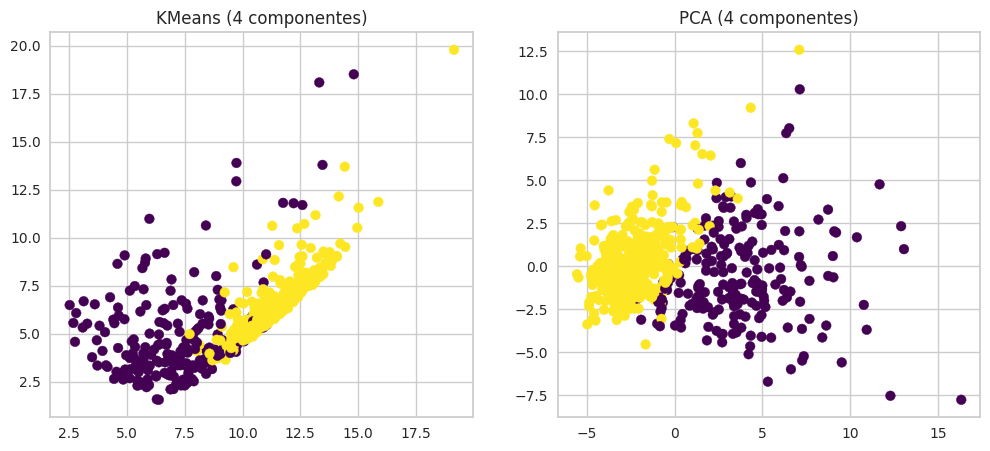

In [58]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kmeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
X_kmeans = kmeans.transform(X_scaled)

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plotando os resultados do KMeans
ax1.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y, cmap='viridis')
ax1.set_title('KMeans (4 componentes)')


# Plotando os resultados do PCA
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax2.set_title('PCA (4 componentes)')


plt.show()